In [1]:
import numpy as np
import matplotlib.pyplot as plt
import VI_Solver as VI  

In [2]:
def CES(A,R,p):
    n = p.shape[0]
    q = np.array([np.power(A[k,:] @ np.power(p, -1 * R[k]) + np.power(10, -1 * R[k]), -1/R[k]) for k in range(n)])
    return q

n = 3
A = np.array([[0.3, 0.0, 0.0],
              [0.0, 0.3, 0.0],
              [0.0, 0.0, 0.9]])
R = np.array([-0.4, 0.6, 0.3])
F = lambda p: p - CES(A,R,p)

s = VI.Solver(F = F, n = n, projector = VI.projector_to_Rn(n))
s.set_value(100 * np.random.random(n))
s.solve(a = 1, M = 10000) #проблема - я не знаю как записать условие остановки
solution = s.value
print(s.value, F(solution)/s.value) # А должен быть 0

[2.43924206e+01 5.51861461e+00 4.64158890e-03] [1.74777915e-15 1.93130736e-15 1.36136185e-09]


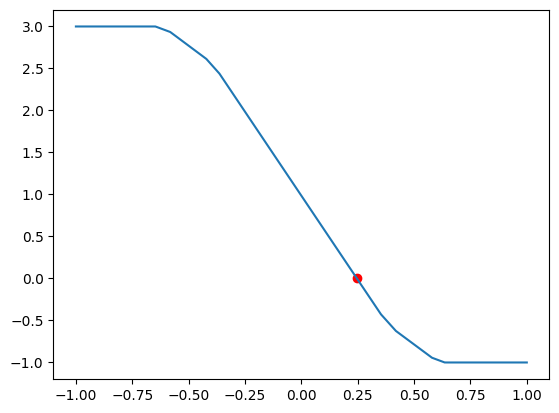

In [3]:
N = 4
x = np.random.rand(N)
y = np.sort(np.concatenate((x, x - np.ones(N))))
g = lambda t: sum([min(1,max(0, x_i - t)) for x_i in x]) - 1
t = np.linspace(-1, 1, num = 1000)

def partition(g: float, x:np.ndarray):
    while(len(x) > 2):
        i = np.random.randint(1, len(x))
        if(g(x[i]) >= 0):
            x = x[i:]
        else:
            x = x[:i+1]
    if(x[0] == x[1]):
        return x[0]
    return (( g(x[1]) * x[0] - g(x[0]) * x[1] )/(g(x[1]) - g(x[0]) ))
    
    
x_ = partition(g = g, x = y)

plt.plot(t,[g(t_i) for t_i in t])
plt.scatter(x_, g(x_), c = 'red')

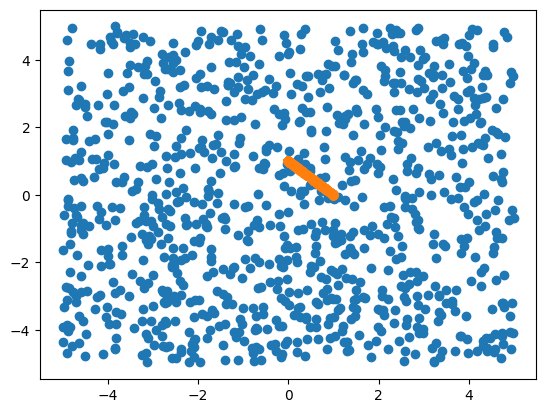

In [4]:
N = 1000
p1 = VI.projector_to_Dn_fast(dim = 2, a = 1)
p2 = VI.projector_to_Dn_slow(dim = 2)
X = 5 * (2 * np.random.random((N, 2)) - np.ones((N, 2)))
Y = np.array([p1(x) for x in X])
Z = np.array([p2(x) for x in X])
plt.scatter(X.T[0],X.T[1])
plt.scatter(Z.T[0],Z.T[1])